#  MSCA 37011 - Deep Learning and Image Recognition

## Python and Numpy Review

### Python

This is an example code for Python

In [1]:
#import python libraries
import numpy as np
from numpy import sqrt
from numpy import meshgrid
from numpy import arange
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division

#print library versions
print ('numpy version:', np.__version__)
print ('matplotlib version:', matplotlib.__version__)

numpy version: 1.14.2
matplotlib version: 2.2.2


In [2]:
#simple math
a = 2
b = 3
print("a+b:", a+b)
print("a*b:", a*b)
print("a**b:", a**b)
print("a^b:", a^b)

a+b: 5
a*b: 6
a**b: 8
a^b: 1


In [3]:
#loops
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print ('#%d: %s' % (idx + 1, animal))

#1: cat
#2: dog
#3: fish


In [4]:
nums = {x for x in range(30)}
print (nums) 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}


In [5]:
from math import sqrt
nums = {int(sqrt(x)) for x in range(30)}
print (nums) 

{0, 1, 2, 3, 4, 5}


## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

In [6]:
import numpy as np

a = np.array([1, 2, 3])  # Create a rank 1 array
print (type(a))            # Prints "<type 'numpy.ndarray'>"
print (a.shape)            # Prints "(3,)"
print (a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                 # Change an element of the array
print (a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print (b.shape)                    # Prints "(2, 3)"
print (b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


In [7]:
# Create an array of all zeros
a = np.zeros((2,2))  
print (a, "\n")             

# Create an array of all ones
b = np.ones((1,2))   
print (b, "\n")               

# Create a constant array
c = np.full((2,2), 7) 
print (c, "\n")                 

# Create a 2x2 identity matrix
d = np.eye(2)        
print (d, "\n")      

# Create an array filled with random values
e = np.random.random((2,2)) 
print (e, "\n")    

[[0. 0.]
 [0. 0.]] 

[[1. 1.]] 

[[7 7]
 [7 7]] 

[[1. 0.]
 [0. 1.]] 

[[0.411692   0.85034812]
 [0.74440399 0.55274285]] 



### Slicing

Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [8]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print (a[0, 1])   # Prints "2"
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print (a[0, 1])   # Prints "77"

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. 

In [9]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print (row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print (row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print (col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print (col_r2, col_r2.shape)  # Prints "[[ 2]
                            #          [ 6]
                            #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


### Datatypes

In [10]:
# Let numpy choose the datatype # Prints "int64"
x = np.array([1, 2]) 
print (x.dtype)         

# Let numpy choose the datatype # Prints "float64"
x = np.array([1.0, 2.0])  
print (x.dtype)            

# Force a particular datatype # Prints "int64"
x = np.array([1, 2], dtype=np.int64)  
print (x.dtype)                        

int32
float64
int64


### Array math

In [11]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print (x + y)
print (np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print (x - y)
print (np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print (x * y)
print (np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print (x / y)
print (np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print (np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


In [12]:
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print (v.dot(w))
print (np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print (x.dot(v))
print (np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print (x.dot(y))
print (np.dot(x, y))

219
219
[29. 67.]
[29. 67.]
[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]


### Vectorization

Vectorization is about sending batches of related operations to native machine code. The machine code itself is typically compiled from carefully optimized C or Fortran. This can greatly accelerate many (but not all) numerical computations

Loop vectorization converts procedural loops that iterate over multiple pairs of data items and assigns a separate processing unit to each pair. Most programs spend most of their execution times within such loops. Vectorizing loops can lead to significant performance gains without programmer intervention, especially on large data sets.

Issues with vectorization:

* Highly memory intensive.For example, the vectorized maximization routine above is far more memory intensive than the non-vectorized version that preceded it.

* Not all algorithms can be vectorized

In these kinds of settings, we need to go back to loops

https://lectures.quantecon.org/py/need_for_speed.html

In [13]:
import math
import timeit

n = 100
v = np.zeros((n,1))
u = np.zeros((n,1))

#explicit loop - slower
def loopexp():
    for i in range(n):
        u[i] = math.exp(v[i])

print("explicit loop:", timeit.timeit(loopexp))

#vectorization - faster        
def vecexp():
    u = np.exp(v)

print("vectorization:", timeit.timeit(vecexp))

explicit loop: 44.537544134497075
vectorization: 0.900610316003366


In [14]:
def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

grid = np.linspace(-3, 3, 10)

#explicit loop - slower
def loopmax():
    m = -np.inf
    for x in grid:
        for y in grid:
            z = f(x, y)
            if z > m:
                m = z

print("explicit loop:", timeit.timeit(loopmax))

explicit loop: 270.09466644494574


In [15]:
x, y = np.meshgrid(grid, grid)

#vectorization - faster        
def vecmax():
    np.max(f(x, y))

print("vectorization:", timeit.timeit(vecmax))

vectorization: 10.590657234775449


### Plotting

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4]


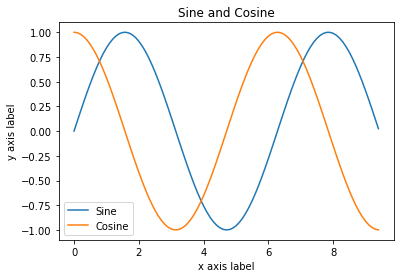

In [8]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
print(x)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


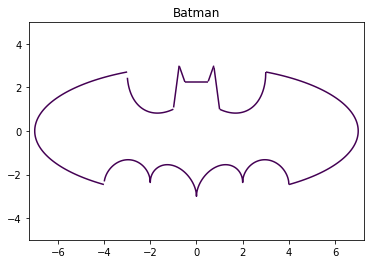

In [21]:
#http://blog.traeblain.com/2011/batman-equation-revisited

xs = arange(-7.25, 7.25, 0.01)
ys = arange(-5, 5, 0.01)
x, y = meshgrid(xs, ys)

eq1 = ((x/7)**2*sqrt(abs(abs(x)-3)/(abs(x)-3))+(y/3)**2*sqrt(abs(y+3/7*sqrt(33))/(y+3/7*sqrt(33)))-1)
eq2 = (abs(x/2)-((3*sqrt(33)-7)/112)*x**2-3+sqrt(1-(abs(abs(x)-2)-1)**2)-y)
eq3 = (9*sqrt(abs((abs(x)-1)*(abs(x)-.75))/((1-abs(x))*(abs(x)-.75)))-8*abs(x)-y)
eq4 = (3*abs(x)+.75*sqrt(abs((abs(x)-.75)*(abs(x)-.5))/((.75-abs(x))*(abs(x)-.5)))-y)
eq5 = (2.25*sqrt(abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
eq6 = (6*sqrt(10)/7+(1.5-.5*abs(x))*sqrt(abs(abs(x)-1)/(abs(x)-1))-(6*sqrt(10)/14)*sqrt(4-(abs(x)-1)**2)-y)

for f in [eq1,eq2,eq3,eq4,eq5,eq6]:
    plt.contour(x, y, f, [0])

plt.title('Batman')
plt.show()